![ML_10.png](Images/ML_10.png)

# Agenda

## 1. What are neural networks and when to use them?
## 2. Multi-layer Perceptron (MLP)
## 3. Activation functions
## 4. Gradient descent (recap) and loss function
## 5. Backpropagation
## 6. Network capacity and overfitting
## 7. L1, L2 regularization
## 8. Dropout
## 9. Batchnorm
## 10. LR schedule
## 11. Early stopping
## 12. CNN
## 13. RNN/Attention

## 1. What are neural networks and when to use them?

Neural networks are computational models inspired by the human brain, consisting of layers of interconnected nodes (neurons). They excel at learning complex, non-linear relationships from data. Neural networks are best used when traditional ML models struggle with high-dimensional, unstructured data such as images, text, and audio.

![deep_learning.ppm](Images/deep_learning.ppm)

## 2. Multi-layer Perceptron (MLP)


A Multi-Layer Perceptron (MLP) is a feedforward neural network consisting of multiple fully connected layers. It is effective for structured/tabular data but less efficient for spatial or sequential data.

**Why important:** Forms the foundation for more complex architectures.

![NN_intuition.png](Images/NN_intuition.png)

In [33]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from torchsummary import summary

# Define MLP
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test  = torch.tensor(y_test, dtype=torch.long)

# DataLoader
train_ds = TensorDataset(X_train, y_train)
test_ds  = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=16)

# Model, loss, optimizer
model = SimpleMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(50):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for xb, yb in test_loader:
        preds = model(xb)
        predicted = torch.argmax(preds, dim=1)
        correct += (predicted == yb).sum().item()
        total += yb.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Show model summary
summary(model, input_size=(1, 4))

Epoch 10, Loss: 0.3247
Epoch 20, Loss: 0.0457
Epoch 30, Loss: 0.0224
Epoch 40, Loss: 0.0601
Epoch 50, Loss: 0.3358
Test Accuracy: 96.67%
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 16]              80
              ReLU-2                [-1, 1, 16]               0
            Linear-3                 [-1, 1, 3]              51
Total params: 131
Trainable params: 131
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


To calculate the parameters in a neural network, you must sum the parameters (weights and biases) for each layer. For a fully connected (dense) layer, the formula is (input_neurons * output_neurons) + output_neurons


## 3. Activation functions

Activation functions introduce non-linearity into neural networks, enabling them to learn complex mappings. Common activation functions include Sigmoid, Tanh, and ReLU. Without them, a neural network would behave like a linear model.

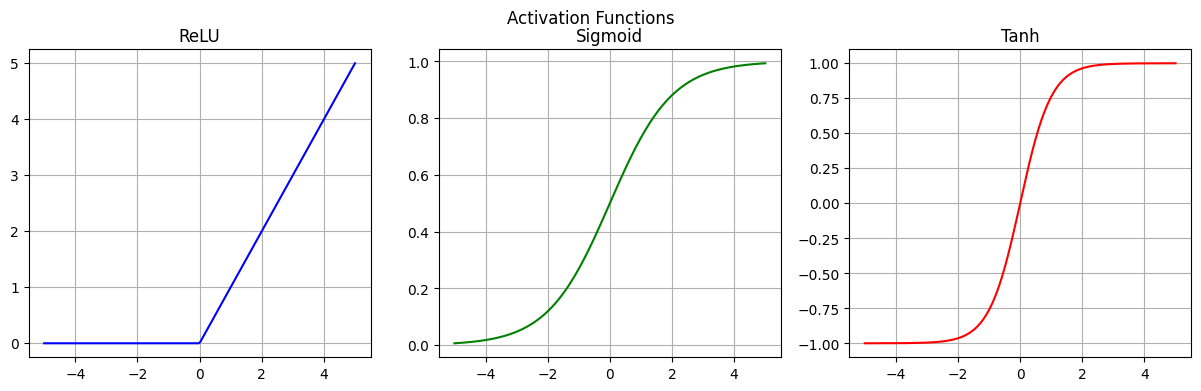

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 200)
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# ReLU
axes[0].plot(x, relu, color="blue")
axes[0].set_title("ReLU")
axes[0].grid(True)

# Sigmoid
axes[1].plot(x, sigmoid, color="green")
axes[1].set_title("Sigmoid")
axes[1].grid(True)

# Tanh
axes[2].plot(x, tanh, color="red")
axes[2].set_title("Tanh")
axes[2].grid(True)

plt.suptitle("Activation Functions")
plt.show()


## 4. Gradient descent and loss function

### Gradient descent recap

Gradient descent is an optimization algorithm that iteratively updates parameters to minimize a loss function. The loss function measures the difference between predictions and ground truth. Together, they guide learning in neural networks.

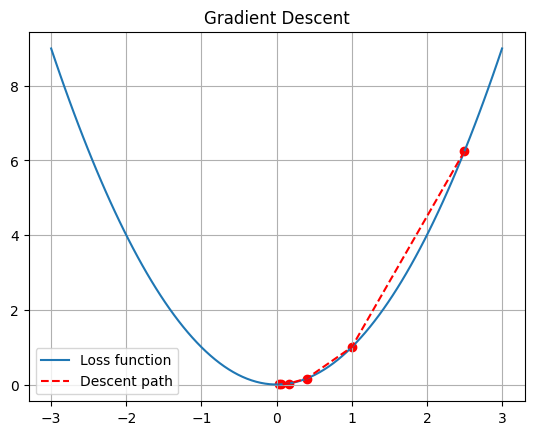

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function: simple quadratic
x = np.linspace(-3, 3, 100)
loss = x**2

# Gradient descent steps
theta = 2.5
steps = [theta]
for _ in range(5):
    grad = 2*theta
    theta -= 0.3*grad
    steps.append(theta)

plt.plot(x, loss, label="Loss function")
plt.scatter(steps, [s**2 for s in steps], color="red")
plt.plot(steps, [s**2 for s in steps], color="red", linestyle="--", label="Descent path")
plt.title("Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


### Loss functions





| Loss Function                 | First Widely Used    | Typical Task                              | Formula (simplified)                        | Pros                                                                       | Cons                                                                                                           |
| ----------------------------- | -------------------- | ----------------------------------------- | ------------------------------------------- | -------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| **Mean Squared Error (MSE)**  | 1950s–60s            | Regression                                | $L = (y - \hat y )^2$                        | Smooth gradients; simple; works well when Gaussian noise assumptions hold  | Very sensitive to outliers; over-penalizes large errors                                                        |
| **Mean Absolute Error (MAE)** | 1990s popularization | Regression                                | $L = abs(y - \hat y)$                        | Robust to outliers; median-optimal                                         | Non-smooth at 0 (uses subgradients); constant gradient can make optimization slower/fussier near the optimum   |
| **Cross-Entropy Loss**        | 1980s                | Classification (multi-class with softmax) | $L = -\sum(y * log(\hat y))$                  | Probabilistic interpretation; maximizes likelihood; well-behaved gradients | Large loss for confident wrong predictions; sensitive to label noise; needs numerically stable implementations |
| **Hinge Loss**                | 1990s                | Classification (margin-based/SVM-style)   | $L = max(0, 1 - y * f(x))$                  | Encourages margins; robust decision boundaries                             | Not probabilistic; less common in deep nets; requires careful label encoding                                   |
| **Focal Loss**                | 2017                 | Imbalanced classification                 | $L = - \alpha * (1 - \hat y)^\gamma * y * log(\hat y)$ | Focuses on hard/minority examples; strong for detection/imbalance          | Extra hyperparameters ($\gamma$, $\alpha$); more tuning complexity                                               |


## 5. Backpropagation


Backpropagation is the algorithm used to compute gradients in a neural network by applying the chain rule of calculus. It allows efficient parameter updates for deep architectures by propagating error gradients backward from the output layer.

![backprop.jpg](Images/backprop.jpg)

In [32]:
x_sample = X_train[0].unsqueeze(0)  # keep batch dimension
y_sample = y_train[0].unsqueeze(0)

y_pred = model(x_sample)
loss = criterion(y_pred, y_sample)

print("Prediction (logits):", y_pred.detach().numpy())
print("Ground truth:", y_train[0])
print("Loss:", loss.item())

# 6. Backward pass
loss.backward()

# 7. Inspect gradients
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}.grad:\n{param.grad}\n")

Prediction (logits): [[  8.865537   -3.7127378 -12.823451 ]]
Ground truth: tensor(0)
Loss: 3.4570634852570947e-06
fc1.weight.grad:
tensor([[-3.8403e-02,  4.1112e-02, -5.2937e-02, -2.7468e-02],
        [ 8.2711e-05, -3.4477e-04,  3.3135e-04,  1.7862e-04],
        [-4.2264e-02, -4.8992e-02,  1.7748e-02,  2.9023e-02],
        [ 6.9576e-05, -2.6859e-04,  2.6278e-04,  1.4449e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-4.4086e-02, -5.1107e-02,  1.8514e-02,  3.0275e-02],
        [ 5.3402e-03,  6.2704e-03, -2.3184e-03, -3.5925e-03],
        [ 2.8335e-02,  3.3361e-02, -1.2296e-02, -1.9669e-02],
        [ 7.3549e-05, -1.1764e-04,  9.5149e-05,  8.0329e-05],
        [-1.9784e-02, -2.2913e-02,  8.2981e-03,  1.3583e-02],
        [-2.6336e-03, -2.9955e-03,  1.0457e-03,  1.8598e-03],
        [-4.4074e-02, -5.1085e-02,  1.8505e-02,  3.0265e-02],
        [ 6.1527e-02,  7.1562e-02, -2.5990e-02, -4.2244e-02],
        [ 8.1091e-05, -3.0700e-04,  3.0184e-04,  1.6683e-04],
 

### Question time!

## 6. Network capacity and overfitting

Network capacity refers to the ability of a neural network to approximate complex functions. High-capacity models can overfit, memorizing training data instead of generalizing. 
Capacity of a neural network model can be increased by:
- adding extra neurons in a given layer
- adding extra layers

This will result in a higher overall number of trainable parameters of a neural network model.

There are several ways to combat overfitting of a neural network:
- use more data
- refine quality of existing data
- utilize regularization techniques
- use a model with smaller capacity

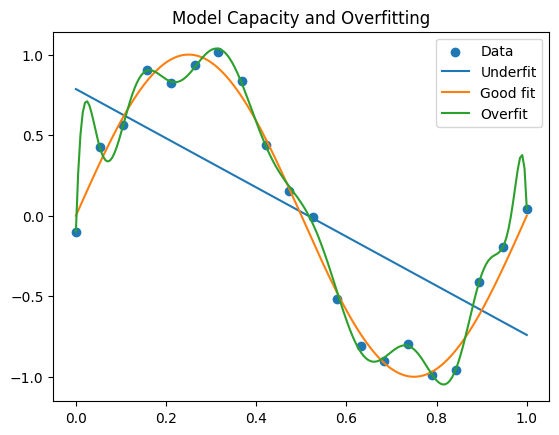

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 20)
y = np.sin(2*np.pi*x) + 0.1*np.random.randn(20)

x_dense = np.linspace(0, 1, 200)

# Underfit (linear)
y_under = np.poly1d(np.polyfit(x, y, 1))(x_dense)
# Good fit (sinusoidal)
y_good = np.sin(2*np.pi*x_dense)
# Overfit (high-degree polynomial)
y_over = np.poly1d(np.polyfit(x, y, 15))(x_dense)

plt.scatter(x, y, label="Data")
plt.plot(x_dense, y_under, label="Underfit")
plt.plot(x_dense, y_good, label="Good fit")
plt.plot(x_dense, y_over, label="Overfit")
plt.legend()
plt.title("Model Capacity and Overfitting")
plt.show()


## 7. L1, L2 regularization


L1 regularization (a.k.a. Lasso penalty) adds the sum of the absolute values of the weights to the loss function. This encourages sparsity in the network’s parameters, meaning many weights are pushed exactly to zero, which can lead to simpler, more interpretable models. However, it may also make optimization harder because the absolute value is not differentiable at zero, and it can slow convergence compared to L2 regularization (usually to be avoided)

L2 regularization penalizes large weights by adding their squared magnitude to the loss. It encourages smaller weights, helping prevent overfitting and improving generalization.

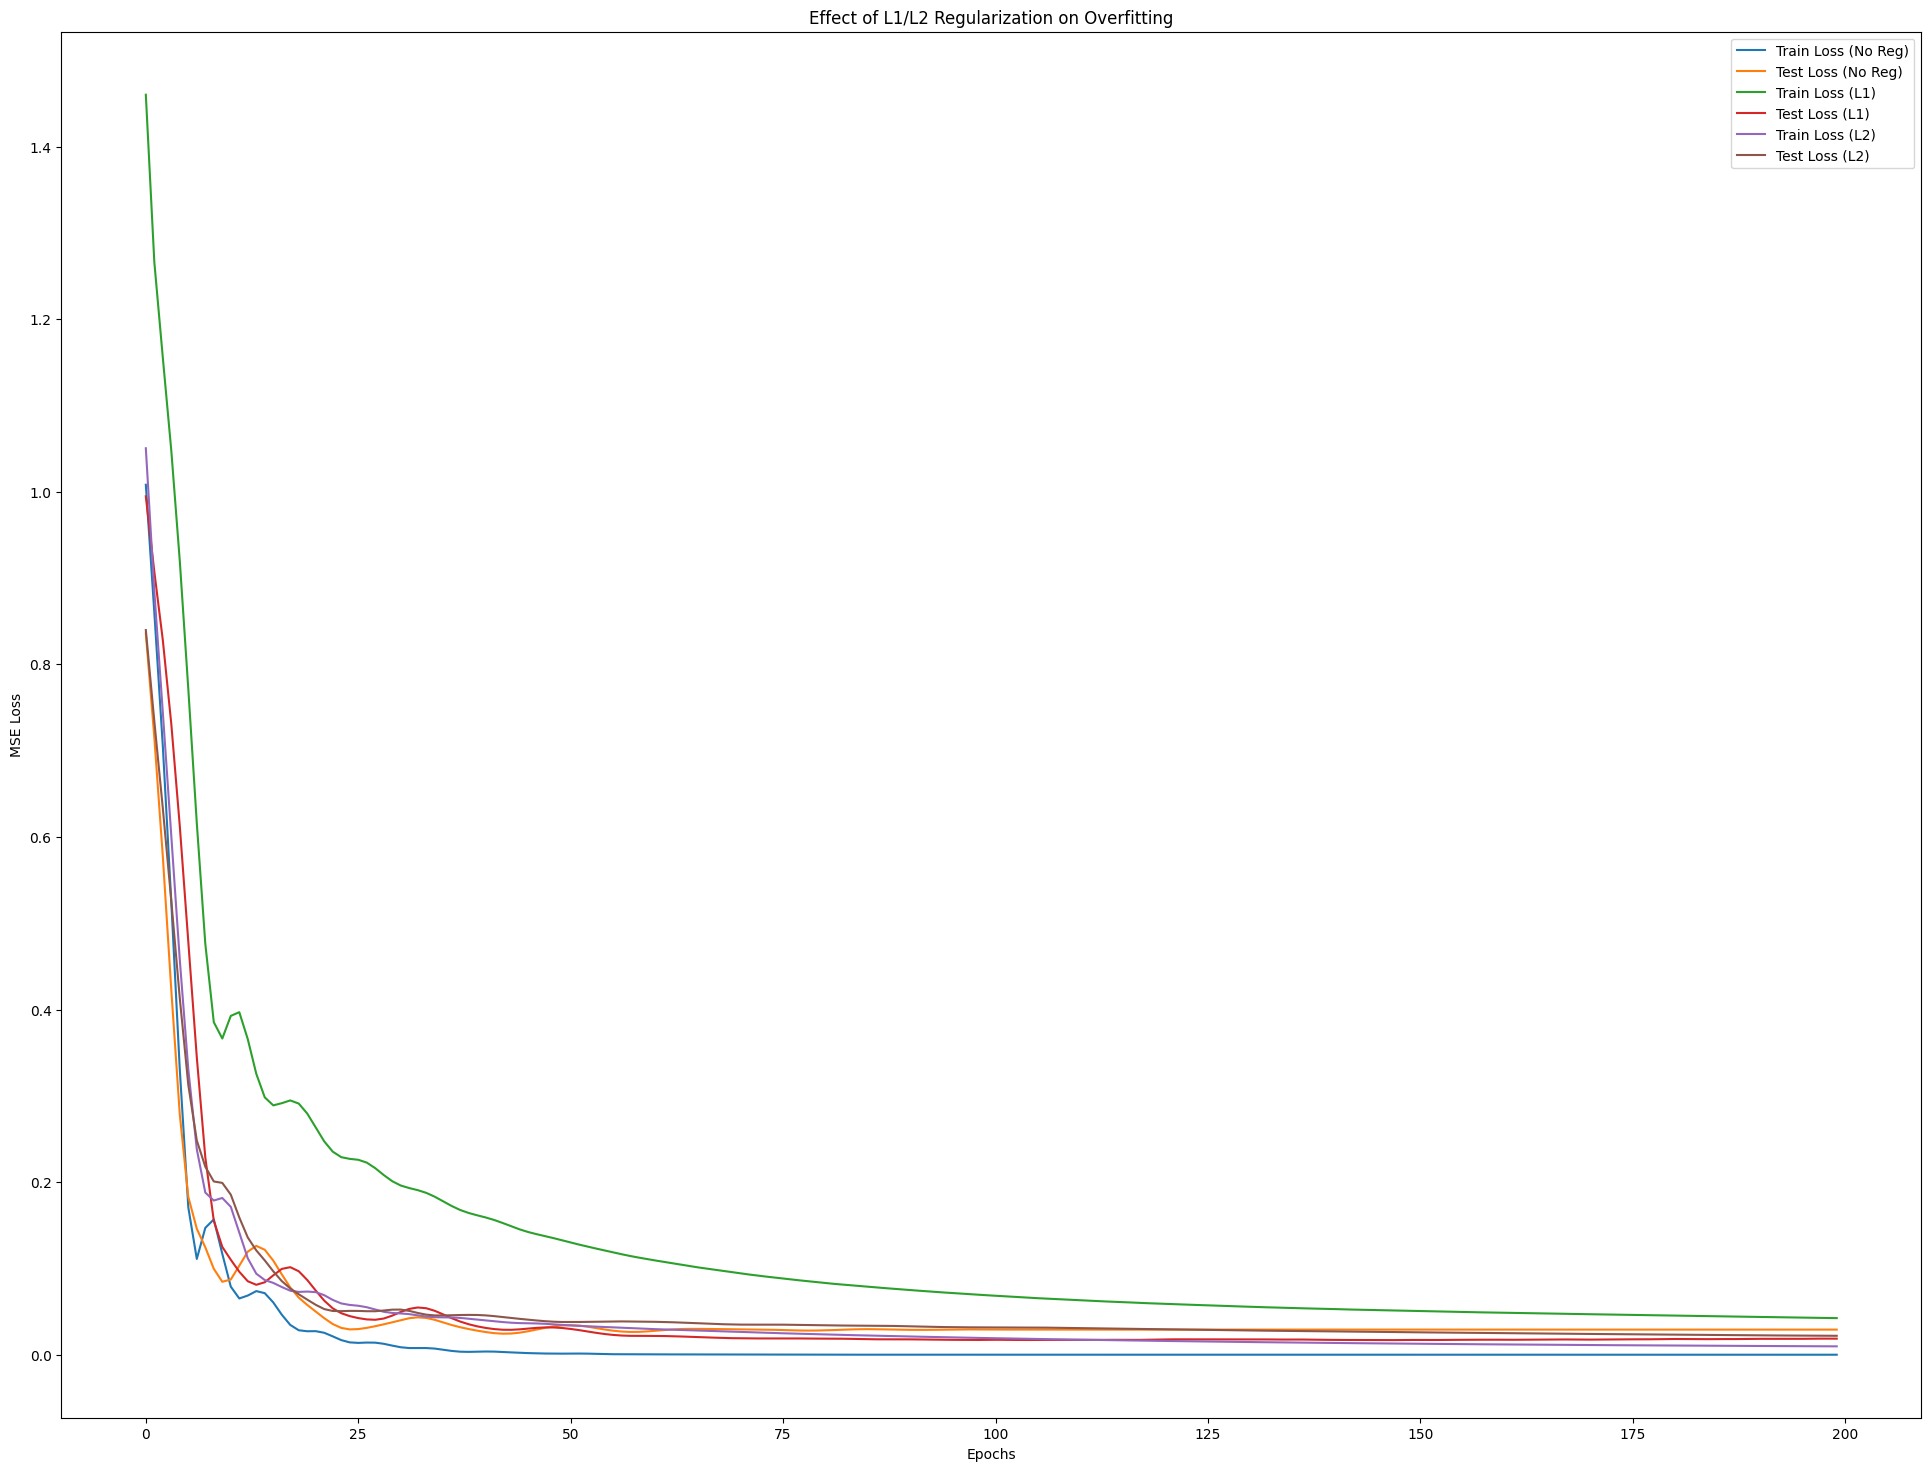

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=20, noise=15.0, random_state=42)
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
y = y.reshape(-1, 1)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

# 2. Define a moderately complex MLP
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# 3. Train function with optional L1/L2 regularization
def train_model(model, X_train, y_train, X_test, y_test, l1_lambda=0.0, l2_lambda=0.0, epochs=200):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    train_losses, test_losses = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # L1 regularization
        if l1_lambda > 0:
            l1_norm = sum(p.abs().sum() for p in model.parameters())
            loss += l1_lambda * l1_norm

        # L2 regularization
        if l2_lambda > 0:
            l2_norm = sum(p.pow(2).sum() for p in model.parameters())
            loss += l2_lambda * l2_norm

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        # Evaluate test loss
        model.eval()
        with torch.no_grad():
            test_loss = criterion(model(X_test), y_test)
            test_losses.append(test_loss.item())

    return train_losses, test_losses

# 4. Train models with and without regularization
model_no_reg = MLP(input_dim=20)
train_loss_no, test_loss_no = train_model(model_no_reg, X_train, y_train, X_test, y_test, epochs=200)

model_l1 = MLP(input_dim=20)
train_loss_l1, test_loss_l1 = train_model(model_l1, X_train, y_train, X_test, y_test, l1_lambda=1e-3, epochs=200)

model_l2 = MLP(input_dim=20)
train_loss_l2, test_loss_l2 = train_model(model_l2, X_train, y_train, X_test, y_test, l2_lambda=1e-3, epochs=200)

# 5. Plot training vs test loss to show overfitting effect
plt.figure(figsize=(24,18))
plt.plot(train_loss_no, label='Train Loss (No Reg)')
plt.plot(test_loss_no, label='Test Loss (No Reg)')
plt.plot(train_loss_l1, label='Train Loss (L1)')
plt.plot(test_loss_l1, label='Test Loss (L1)')
plt.plot(train_loss_l2, label='Train Loss (L2)')
plt.plot(test_loss_l2, label='Test Loss (L2)')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Effect of L1/L2 Regularization on Overfitting")
plt.legend()
plt.show()


## 8. Dropout

Dropout randomly disables a fraction of neurons during training. This prevents co-adaptation of features, improving generalization. At inference, all neurons are active but scaled accordingly.

![dropout.png](Images/dropout.png)

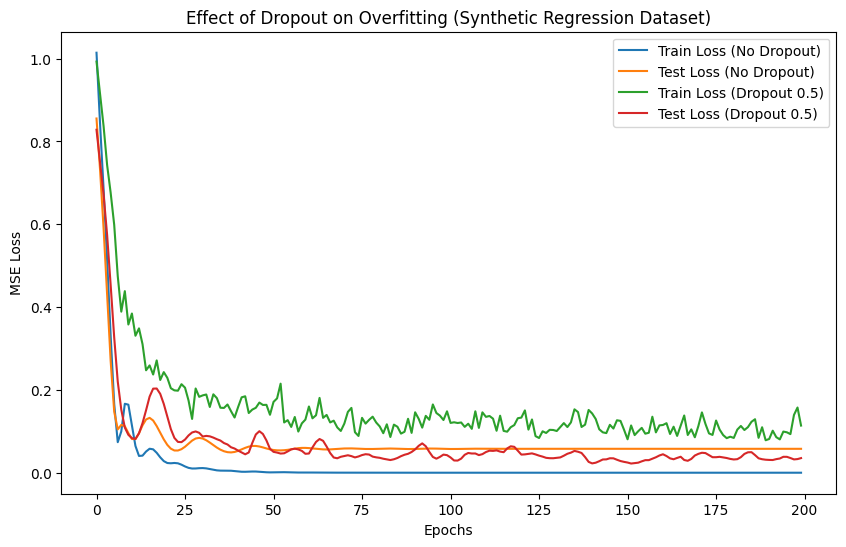

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 2. Define MLP with Dropout
class MLPDropout(nn.Module):
    def __init__(self, input_dim, dropout_p=0.5):
        super(MLPDropout, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# 3. Training function
def train_model(model, X_train, y_train, X_test, y_test, epochs=200):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    train_losses, test_losses = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        model.eval()
        with torch.no_grad():
            test_loss = criterion(model(X_test), y_test)
            test_losses.append(test_loss.item())

    return train_losses, test_losses

# 4. Train models with and without Dropout
model_no_dropout = MLPDropout(input_dim=20, dropout_p=0.0)
train_no, test_no = train_model(model_no_dropout, X_train, y_train, X_test, y_test)

model_dropout = MLPDropout(input_dim=20, dropout_p=0.5)
train_do, test_do = train_model(model_dropout, X_train, y_train, X_test, y_test)

# 5. Plot training vs test loss to show overfitting effect
plt.figure(figsize=(10,6))
plt.plot(train_no, label='Train Loss (No Dropout)')
plt.plot(test_no, label='Test Loss (No Dropout)')
plt.plot(train_do, label='Train Loss (Dropout 0.5)')
plt.plot(test_do, label='Test Loss (Dropout 0.5)')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Effect of Dropout on Overfitting (Synthetic Regression Dataset)")
plt.legend()
plt.show()


## 9. Batchnorm

Batch Normalization normalizes intermediate activations within each mini-batch. It reduces internal covariate shift, stabilizes training, and allows higher learning rates.

**Why important:** Helps accelerate training and improves stability in deep networks.

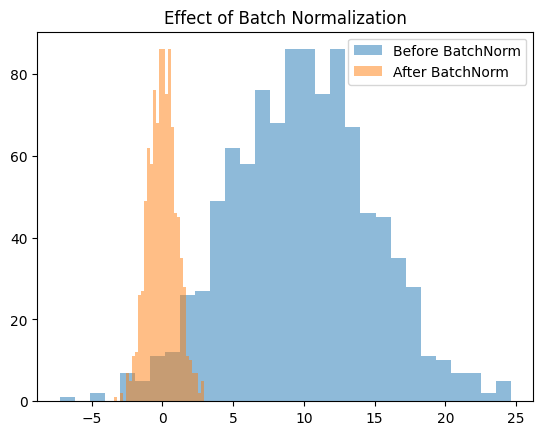

In [46]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(1000) * 5 + 10  # shifted distribution
normed = (data - np.mean(data)) / np.std(data)

plt.hist(data, bins=30, alpha=0.5, label="Before BatchNorm")
plt.hist(normed, bins=30, alpha=0.5, label="After BatchNorm")
plt.legend()
plt.title("Effect of Batch Normalization")
plt.show()

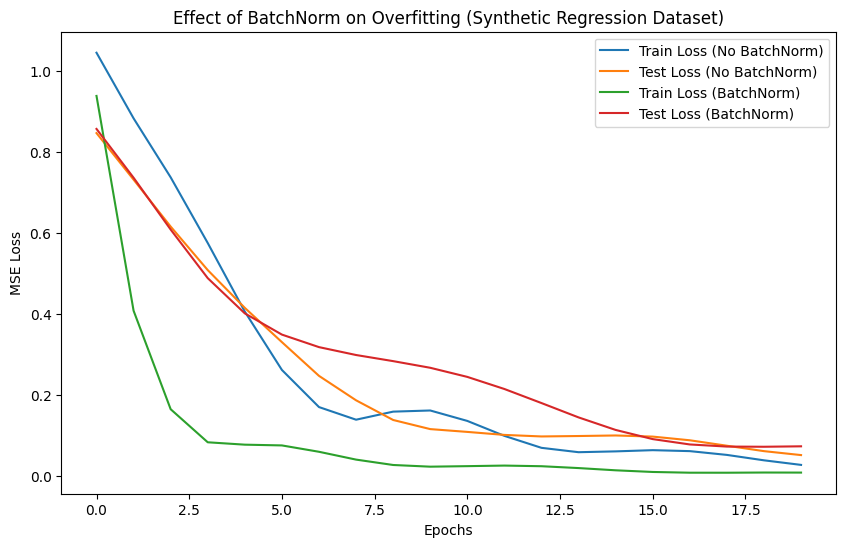

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 2. Define MLP with BatchNorm
class MLPBatchNorm(nn.Module):
    def __init__(self, input_dim):
        super(MLPBatchNorm, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# 3. Training function
def train_model(model, X_train, y_train, X_test, y_test, epochs=20):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    train_losses, test_losses = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        model.eval()
        with torch.no_grad():
            test_loss = criterion(model(X_test), y_test)
            test_losses.append(test_loss.item())

    return train_losses, test_losses

# 4. Train models with and without BatchNorm
model_no_bn = MLPBatchNorm(input_dim=20)
train_no_bn, test_no_bn = train_model(model_no_bn, X_train, y_train, X_test, y_test)

# To see effect, we can also compare with a standard MLP without BatchNorm
class MLPStandard(nn.Module):
    def __init__(self, input_dim):
        super(MLPStandard, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model_standard = MLPStandard(input_dim=20)
train_std, test_std = train_model(model_standard, X_train, y_train, X_test, y_test)

# 5. Plot training vs test loss
plt.figure(figsize=(10,6))
plt.plot(train_std, label='Train Loss (No BatchNorm)')
plt.plot(test_std, label='Test Loss (No BatchNorm)')
plt.plot(train_no_bn, label='Train Loss (BatchNorm)')
plt.plot(test_no_bn, label='Test Loss (BatchNorm)')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Effect of BatchNorm on Overfitting (Synthetic Regression Dataset)")
plt.legend()
plt.show()


### Question time!

## 10. LR schedule

A learning rate schedule adjusts the learning rate during training. Common strategies include step decay, exponential decay, and cosine annealing. This helps convergence and avoids poor local minima.

**Why important:** Improves training efficiency and final model quality.

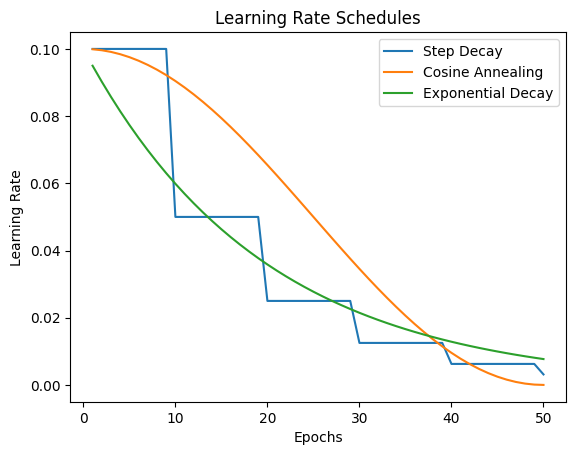

In [72]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, 51)

# Step Decay
lr_step = 0.1 * (0.5 ** (epochs // 10))

# Cosine Annealing
lr_cosine = 0.1 * (1 + np.cos(np.pi * epochs / 50)) / 2

# Exponential Decay
decay_rate = 0.95
lr_exp = 0.1 * (decay_rate ** epochs)

plt.plot(epochs, lr_step, label="Step Decay")
plt.plot(epochs, lr_cosine, label="Cosine Annealing")
plt.plot(epochs, lr_exp, label="Exponential Decay")

plt.legend()
plt.title("Learning Rate Schedules")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.show()


## 11. Early stopping

Early stopping halts training when validation performance stops improving. It prevents overfitting by stopping before the model memorizes noise.

**Why important:** Helps maintain generalization and avoids wasted computation.

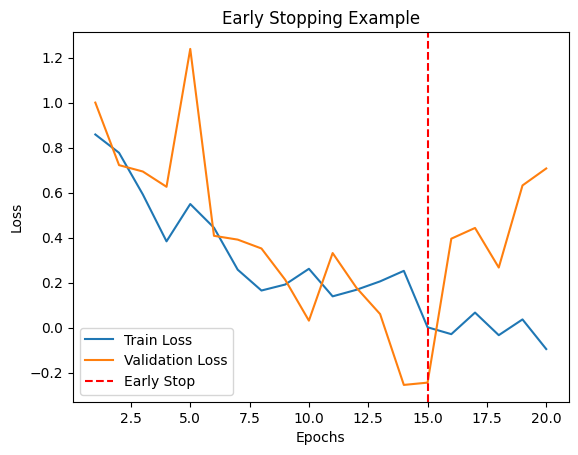

In [73]:

import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, 21)
train_loss = np.exp(-epochs/5) + 0.1*np.random.randn(20)
val_loss = np.exp(-epochs/7) + 0.2*np.random.randn(20)
val_loss[15:] += 0.5  # simulate overfitting

plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.axvline(15, color="r", linestyle="--", label="Early Stop")
plt.legend()
plt.title("Early Stopping Example")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## 12. CNN

Convolutional Neural Networks (CNNs) are specialized for grid-like data such as images. They use convolutional filters to capture local patterns and are highly efficient for vision tasks.

**Why important:** Key to breakthroughs in computer vision.

![convolution2.gif](Images/convolution2.gif)

100.0%
100.0%
100.0%
100.0%


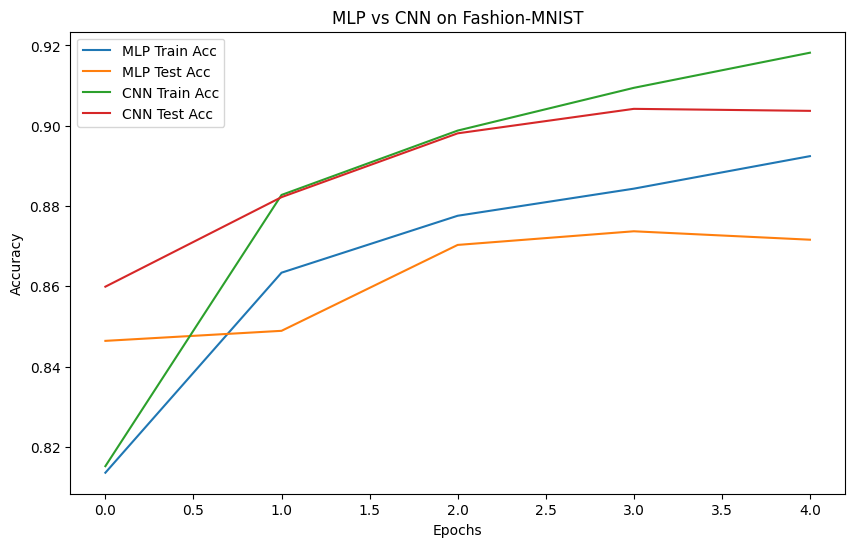

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Data preparation
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# 2. Simple MLP
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        return self.fc(x)

# 3. Simple CNN
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)

# 4. Training function
def train_model(model, train_loader, test_loader, epochs=5, lr=0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_acc_list, test_acc_list = [], []

    for epoch in range(epochs):
        # Training
        model.train()
        correct, total = 0, 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            preds = outputs.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
        train_acc_list.append(correct / total)

        # Testing
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for X, y in test_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                preds = outputs.argmax(dim=1)
                correct += (preds == y).sum().item()
                total += y.size(0)
        test_acc_list.append(correct / total)
    
    return train_acc_list, test_acc_list

# 5. Train MLP and CNN
mlp = MLP()
cnn = CNN()

train_acc_mlp, test_acc_mlp = train_model(mlp, train_loader, test_loader, epochs=5)
train_acc_cnn, test_acc_cnn = train_model(cnn, train_loader, test_loader, epochs=5)

# 6. Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(train_acc_mlp, label='MLP Train Acc')
plt.plot(test_acc_mlp, label='MLP Test Acc')
plt.plot(train_acc_cnn, label='CNN Train Acc')
plt.plot(test_acc_cnn, label='CNN Test Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP vs CNN on Fashion-MNIST")
plt.legend()
plt.show()


In [66]:
summary(mlp, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
              ReLU-3                  [-1, 256]               0
            Linear-4                  [-1, 128]          32,896
              ReLU-5                  [-1, 128]               0
            Linear-6                   [-1, 10]           1,290
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.90
Estimated Total Size (MB): 0.91
----------------------------------------------------------------


In [65]:
summary(cnn, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           4,640
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6             [-1, 32, 7, 7]               0
           Flatten-7                 [-1, 1568]               0
            Linear-8                  [-1, 128]         200,832
              ReLU-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.34
Params size (MB): 0.79
Estimated T

## 13. RNN/Attention

Recurrent Neural Networks (RNNs) process sequential data by maintaining hidden states. Attention mechanisms improve upon RNNs by directly focusing on relevant parts of the sequence, leading to modern architectures like Transformers.

**Why important:** Foundation for NLP and sequence modeling, enabling models like GPT and BERT.

![RNN.webp](Images/RNN.webp)

### RNN Block Formula

At time step $t$:

$$
h_t = \tanh(W_{xh} x_t + W_{hh} h_{t-1} + b_h)
$$

$$
y_t = W_{hy} h_t + b_y
$$

- $x_t$ – input vector at time $t$  
- $h_t$ – hidden state at time $t$  
- $y_t$ – output at time $t$  
- $W_{xh}, W_{hh}, W_{hy}$ – weight matrices  
- $b_h, b_y$ – biases  


![attention.gif](Images/attention.gif)

### Question time!